In [28]:
from __future__ import print_function
import keras
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

batch_size = 128
epochs = 10
cardinality = 100
channels = 5
grid_width, grid_height = 10, 10

x_train = np.ndarray(shape=(cardinality, grid_width, grid_height, channels))
x_test = np.ndarray(shape=(cardinality, grid_width, grid_height, channels))

y_train = np.ndarray(shape=(cardinality))
y_test = np.ndarray(shape=(cardinality))
input_shape = (grid_width, grid_height, channels)

x_train shape: (100, 10, 10, 5)
100 train samples
100 test samples
Train on 100 samples, validate on 100 samples
Epoch 1/10
100/100 [==============================] - 1s 6ms/step - loss: 1.0000 - mean_absolute_error: 1.0000 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/10
100/100 [==============================] - 0s 128us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/10
100/100 [==============================] - 0s 128us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/10
100/100 [==============================] - 0s 129us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/10
100/100 [==============================] - 0s 133us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/10
100/100 [==============================] - 0s 129us/step - loss: nan - mean_absolute_error: nan - val_

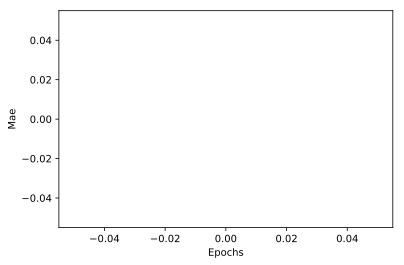

In [40]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(),
              metrics=['mae'])


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.mae = []

    def on_epoch_end(self, batch, logs={}):
        self.mae.append(logs.get('mae'))

        
history = AccuracyHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test mae:', score[1])
plt.plot(range(1, 11), history.mae)
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.show()